In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [6]:
data = fetch_california_housing()
x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


In [7]:
model = DecisionTreeRegressor(max_depth=50, random_state=42)

#melatih model dengan data latih
model.fit(x_train, y_train)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

In [8]:
#menghitung mean squared eror pada data latih dan uji
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Training MSE : {train_mse}')
print(f'Test MSE : {test_mse}')

Training MSE : 1.0357621381535573e-31
Test MSE : 0.4942716777366763


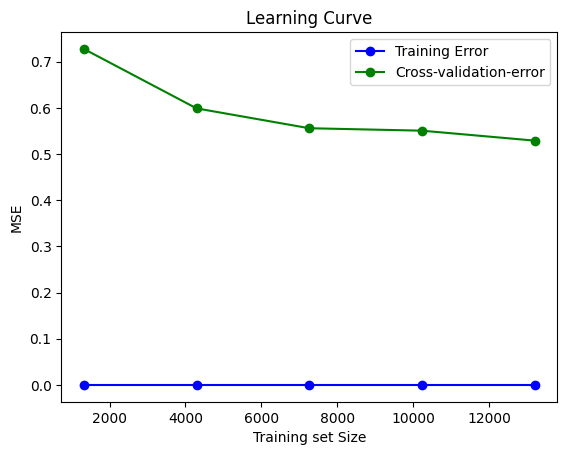

In [32]:
#cara lain mengindentifikasi overfitting
#learning curve

from sklearn.model_selection import learning_curve

train_size, train_score, test_score = learning_curve(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

#menghitung rata-rata dan standardeviasi
train_mean = -np.mean(train_score, axis=1)
test_mean = -np.mean(test_score, axis=1)

plt.plot(train_size, train_mean, 'o-', color='blue', label='Training Error')
plt.plot(train_size, test_mean, 'o-', color='green', label='Cross-validation-error')
plt.title('Learning Curve')
plt.xlabel('Training set Size')
plt.ylabel('MSE')
plt.legend()
plt.show()



In [34]:
train_mean, test_mean

(array([1.22632013e-31, 7.66069956e-32, 7.44987033e-32, 7.82387252e-32,
        8.27034123e-32]),
 array([0.72773062, 0.59897329, 0.55594992, 0.55067084, 0.52909413]))

# MENGATASI OVERFITTING

1.  Cross Validation

In [39]:
from sklearn.model_selection import cross_val_score

#menggunakan cross validation dengan 5 fold
cross_val_score = cross_val_score(model, x_train, y_train, cv=5, scoring='neg_mean_squared_error' )

#menampilkan hasil cross validation
print(f'Cross Validation MSE : {-cross_val_score}')

Cross Validation MSE : [0.56475892 0.53850549 0.49089631 0.5345087  0.49401193]


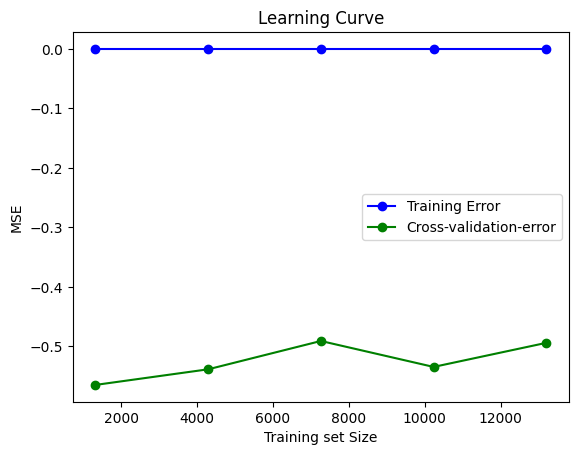

In [ ]:
plt.plot(train_size, train_mean, 'o-', color='blue', label='Training Error')
plt.plot(train_size, cross_val_score, 'o-', color='green', label='Cross-validation-error')
plt.title('Learning Curve')
plt.xlabel('Training set Size')
plt.ylabel('MSE')
plt.legend()
plt.show()

2. Regularization


In [42]:
#membuat model desision tree dengan kedalaman lebih kecil
model_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
model_reg.fit(x_train, y_train)

y_train_pred_reg = model_reg.predict(x_train)
y_test_pred_reg = model_reg.predict(x_test)

train_mse_reg = mean_squared_error(y_train, y_train_pred_reg)
test_mse_reg = mean_squared_error(y_test, y_test_pred)

print(f'Training MSE (After Regularization) {train_mse_reg}')
print(f'Test MSE (After Regularization) : {test_mse_reg}')

Training MSE (After Regularization) 0.4843432765009063
Test MSE (After Regularization) : 0.4942716777366763
